In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd

In [ ]:
link = 'https://drive.google.com/file/d/1YsoGTtlEVzg5TnmUdOb1PWUK6MT6S86k/view?usp=share_link'

In [ ]:
path = 'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]
df = pd.read_csv(path)

In [ ]:
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [ ]:
# bỏ cột datetime
df.drop(columns=['instant', 'dteday'], inplace=True)

<Axes: >

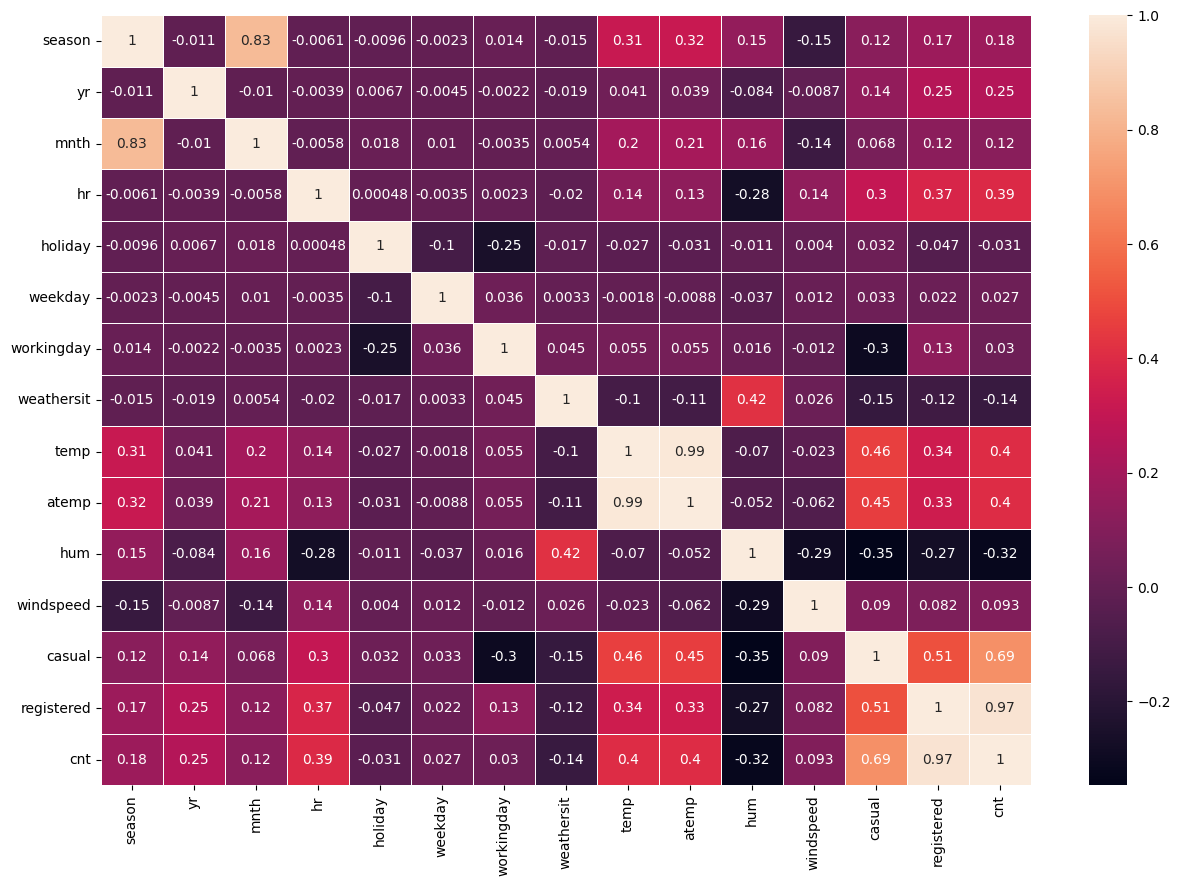

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr = df.corr()

# Plot correlation matrix
fig, ax = plt.subplots(figsize=(15,10))         # Sample figsize in inches
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)

In [ ]:
# Nhận thấy cột temp và atemp có độ tương quan rất cao, do đó xoá 1 trong 2 cột này đi để tránh hiện tượng đa cộng tuyến -> xoá atemp
# Tương tự 2 cột season và month, cũng có độ tương quan rất cao -> month
df.drop(columns=['atemp', 'mnth'], inplace=True)

In [ ]:
df

,season,yr,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,0,0,0,6,0,1,0.24,0.81,0.0000,3,13,16
1,1,0,1,0,6,0,1,0.22,0.80,0.0000,8,32,40
2,1,0,2,0,6,0,1,0.22,0.80,0.0000,5,27,32
3,1,0,3,0,6,0,1,0.24,0.75,0.0000,3,10,13
4,1,0,4,0,6,0,1,0.24,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,19,0,1,1,2,0.26,0.60,0.1642,11,108,119
17375,1,1,20,0,1,1,2,0.26,0.60,0.1642,8,81,89
17376,1,1,21,0,1,1,1,0.26,0.60,0.1642,7,83,90
17377,1,1,22,0,1,1,1,0.26,0.56,0.1343,13,48,61


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [ ]:
###### Chuẩn hoá dữ liệu
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
df = scaler.transform(df)

In [ ]:
df = pd.DataFrame(data=df, columns=['season','yr','hr','holiday','weekday','workingday','weathersit','temp','hum','windspeed','casual','registered','cnt'])
df

,season,yr,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,-1.356634,-1.005134,-1.670004,-0.172112,1.493891,-1.46690,-0.665193,-1.334648,0.947372,-1.553889,-0.662755,-0.930189,-0.956339
1,-1.356634,-1.005134,-1.525374,-0.172112,1.493891,-1.46690,-0.665193,-1.438516,0.895539,-1.553889,-0.561343,-0.804655,-0.824022
2,-1.356634,-1.005134,-1.380744,-0.172112,1.493891,-1.46690,-0.665193,-1.438516,0.895539,-1.553889,-0.622190,-0.837690,-0.868128
3,-1.356634,-1.005134,-1.236115,-0.172112,1.493891,-1.46690,-0.665193,-1.334648,0.636370,-1.553889,-0.662755,-0.950010,-0.972879
4,-1.356634,-1.005134,-1.091485,-0.172112,1.493891,-1.46690,-0.665193,-1.334648,0.636370,-1.553889,-0.723603,-1.009474,-1.039037
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,-1.356634,0.994892,1.077962,-0.172112,-0.998987,0.68171,0.898924,-1.230779,-0.141137,-0.211691,-0.500495,-0.302517,-0.388478
17375,-1.356634,0.994892,1.222591,-0.172112,-0.998987,0.68171,0.898924,-1.230779,-0.141137,-0.211691,-0.561343,-0.480908,-0.553875
17376,-1.356634,0.994892,1.367221,-0.172112,-0.998987,0.68171,-0.665193,-1.230779,-0.141137,-0.211691,-0.581625,-0.467694,-0.548361
17377,-1.356634,0.994892,1.511851,-0.172112,-0.998987,0.68171,-0.665193,-1.230779,-0.348473,-0.456099,-0.459930,-0.698942,-0.708245


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('cnt', axis = 1).values, df.cnt,
                                                    test_size=0.3, random_state = 42)

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# KNN
from sklearn.neighbors import KNeighborsRegressor

# Define KNN model
knn = KNeighborsRegressor()

# Define hyperparameters space
param_dist = {'n_neighbors': np.arange(1, 10),
              'metric': ['euclidean', 'manhattan', 'chebyshev']}

# Define Random Search
random_search = RandomizedSearchCV(knn, param_distributions=param_dist,
                                   n_iter=5)

# Fit the Random Search to the data
random_search.fit(X_train, y_train)

best_params = random_search.best_params_

model = KNeighborsRegressor(**best_params)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)
print(best_params)

RMSE: 0.16814970124447504
{'n_neighbors': 8, 'metric': 'manhattan'}


In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import randint

# Định nghĩa mô hình DecisionTreeRegressor
dt = DecisionTreeRegressor()

# Xác định các siêu tham số cần tìm kiếm và phạm vi giá trị của chúng
param_dist = {'max_depth': randint(1, 10),
              'min_samples_split': randint(2, 10),
              'min_samples_leaf': randint(1, 10),
              'max_features': ['sqrt', 'log2', None]}

# Sử dụng RandomizedSearchCV để tìm kiếm siêu tham số tốt nhất
random_search = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=100)
random_search.fit(X_train, y_train)

# Lấy siêu tham số tốt nhất được tìm thấy trong quá trình tìm kiếm
best_params = random_search.best_params_

best_dt = DecisionTreeRegressor(**best_params)
best_dt.fit(X_train, y_train)

y_pred = best_dt.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)
print(best_params)

RMSE: 0.036196501916565364
{'max_depth': 9, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 7}


In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

# Xác định các siêu tham số cần tìm kiếm và phạm vi giá trị của chúng
param_dist = {'n_estimators': randint(10, 20),
              'max_depth': randint(1, 20),
              'min_samples_split': randint(2, 10),
              'min_samples_leaf': randint(1, 10),
              'max_features': ['sqrt', 'log2', None]}

# Sử dụng RandomizedSearchCV để tìm kiếm siêu tham số tốt nhất
rs = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=100)
rs.fit(X_train, y_train)

# Lấy siêu tham số tốt nhất được tìm thấy trong quá trình tìm kiếm
best_params = random_search.best_params_

best_rf = RandomForestRegressor(**best_params)
best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)
print(best_params)

RMSE: 0.017809892159788468
{'max_depth': 9, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 7}


In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define Catboost model
cat = CatBoostRegressor()

# Define hyperparameters space
param_dist = {'learning_rate': np.arange(0.01, 0.5, 0.01),
              'depth': np.arange(3, 11),
              'l2_leaf_reg': np.arange(1, 11),
              'iterations': np.arange(100, 1001, 100)}

# Define Random Search
random_search = RandomizedSearchCV(cat, param_distributions=param_dist,
                                   n_iter=10, cv=5)

# Fit the Random Search to the data
random_search.fit(X_train, y_train)

best_params = random_search.best_params_

model = CatBoostRegressor(**best_params)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)

Streaming output truncated to the last 5000 lines.
301:	learn: 0.0051387	total: 1s	remaining: 1.98s
302:	learn: 0.0051132	total: 1s	remaining: 1.98s
303:	learn: 0.0050974	total: 1.01s	remaining: 1.97s
304:	learn: 0.0050849	total: 1.01s	remaining: 1.97s
305:	learn: 0.0050784	total: 1.01s	remaining: 1.97s
306:	learn: 0.0050606	total: 1.01s	remaining: 1.96s
307:	learn: 0.0050453	total: 1.02s	remaining: 1.96s
308:	learn: 0.0050328	total: 1.02s	remaining: 1.95s
309:	learn: 0.0050177	total: 1.02s	remaining: 1.95s
310:	learn: 0.0050060	total: 1.03s	remaining: 1.95s
311:	learn: 0.0049968	total: 1.03s	remaining: 1.94s
312:	learn: 0.0049886	total: 1.03s	remaining: 1.94s
313:	learn: 0.0049722	total: 1.04s	remaining: 1.93s
314:	learn: 0.0049622	total: 1.04s	remaining: 1.93s
315:	learn: 0.0049351	total: 1.05s	remaining: 1.94s
316:	learn: 0.0049296	total: 1.05s	remaining: 1.94s
317:	learn: 0.0049277	total: 1.06s	remaining: 1.94s
318:	learn: 0.0049089	total: 1.06s	remaining: 1.93s
319:	learn: 0.00489

In [ ]:
print(best_params)

{'learning_rate': 0.31, 'l2_leaf_reg': 2, 'iterations': 500, 'depth': 3}


In [ ]:
# XGBoost
import xgboost as xgb

xgb_model = xgb.XGBRegressor(random_state=42)

params = {
    "n_estimators": np.arange(10, 201, 10),
    "max_depth": np.arange(3, 11),
    "learning_rate": np.arange(0.01, 0.05, 0.01)
}

random_search = RandomizedSearchCV(xgb_model, param_distributions=params,
                                   n_iter=50, cv=5, n_jobs=-1, random_state=42)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_

model_xgb = xgb.XGBRegressor(**best_params)
model_xgb.fit(X_train, y_train)

y_pred = model_xgb.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)
print(best_params)

RMSE: 0.01204942995852222
{'n_estimators': 190, 'max_depth': 8, 'learning_rate': 0.04}


In [ ]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(random_state=42)
params = {
    "n_estimators": np.arange(10, 201, 10),
    "max_depth": np.arange(3, 11),
    "learning_rate": np.arange(0.01, 0.05, 0.01)
}

random_search = RandomizedSearchCV(gb_model, param_distributions=params,
                                   n_iter=50, cv=5, n_jobs=-1, random_state=42)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_

model = GradientBoostingRegressor(**best_params)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)
print(best_params)


RMSE: 0.012372540411247237
{'n_estimators': 190, 'max_depth': 8, 'learning_rate': 0.04}


In [ ]:
# LightGBM
import lightgbm as lgb

model = lgb.LGBMRegressor()

params = {
    'learning_rate': np.arange(0.01, 0.05, 0.01),
    'num_leaves': np.arange(10, 40, 10),
    'max_depth': np.arange(3, 11),
}

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=params,
    n_iter=50,
    cv = 5,
    random_state=42
)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_

model = lgb.LGBMRegressor(**best_params)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)
print(best_params)

RMSE: 0.02618372035441105
{'num_leaves': 30, 'max_depth': 5, 'learning_rate': 0.04}


In [ ]:
# Kết luận mô hình XBoost cho kết quả tốt nhất